## Importing some basic Python Libraries

In [817]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics
from numpy import percentile
from numpy.random import rand

## Question-1)  The student directory for a large university has 400 pages with 130 names per page, a total of 52,000 names. Using software, show how to select a simple random sample of 10 names.

In [818]:
import random

# Create a list of all names
names = []
for page in range(400):
    for name in range(130):
        names.append("name"+str(page*130+name))

# Select a simple random sample of 10 names
sample = random.sample(names, 10)
print(sample)

['name41301', 'name45325', 'name3883', 'name12433', 'name14653', 'name23551', 'name21032', 'name19568', 'name17642', 'name13586']


## Question-2) From the Murder data file, use the variable murder, which is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC). Using software:

In [819]:
# Importing dataset for Question-2
murder = pd.read_excel('murder_data.xlsx')
# removing DC observation from the data
murder.drop(50,axis=0,inplace=True)

### a) Find the mean and standard deviation and interpret their values.

In [820]:
#calculating mean
Mean_data = murder["Murder"].mean()
Mean_data

4.8740000000000006

In [821]:
# Calculating median
print(statistics.median(murder["Murder"]))

4.85


In [822]:
#Calculating Standard Deviation
murder['Murder'].std()

2.586291174793806

### b) Find the five-number summary, and construct the corresponding boxplot.

In [823]:
# five number summary without DC observation
quartiles = percentile(murder["Murder"], [25, 50, 75])
data_min, data_max = murder["Murder"].min(), murder["Murder"].max()
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

Min: 1.000
Q1: 2.625
Median: 4.850
Q3: 6.175
Max: 12.400


In [824]:
murder_rate = murder['Murder']

<AxesSubplot:>

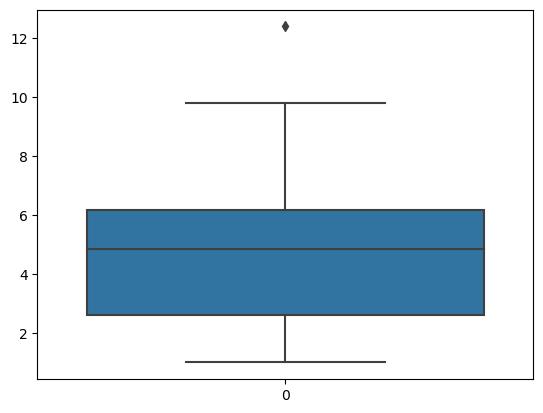

In [825]:
#creating boxplot
import seaborn as sns
summary = murder_rate.describe()
sns.boxplot(data=murder_rate)

### c) Now include the observation for D.C. What is affected more by this outlier: The mean or the median?

In [826]:
# importing data including DC
murder = pd.read_excel('murder_data.xlsx')

In [827]:
# five number summary with DC observation
quartiles = percentile(murder["Murder"], [25, 50, 75])
data_min, data_max = murder["Murder"].min(), murder["Murder"].max()
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

Min: 1.000
Q1: 2.650
Median: 5.000
Q3: 6.450
Max: 24.200


In [828]:
# calculating median
print(statistics.median(murder["Murder"]))

5.0


In [829]:
# calculating mean
Mean_data = murder["Murder"].mean()
Mean_data

5.252941176470589

## Question-3 The Houses data file lists the selling price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes,0 = no) for 100 home sales in Gainesville, Florida. Let’s analyze the selling prices.

In [830]:
## Importing dataset for Question-3
Houses = pd.read_excel('houses_data.xlsx')

### a) Construct a frequency distribution and a histogram.

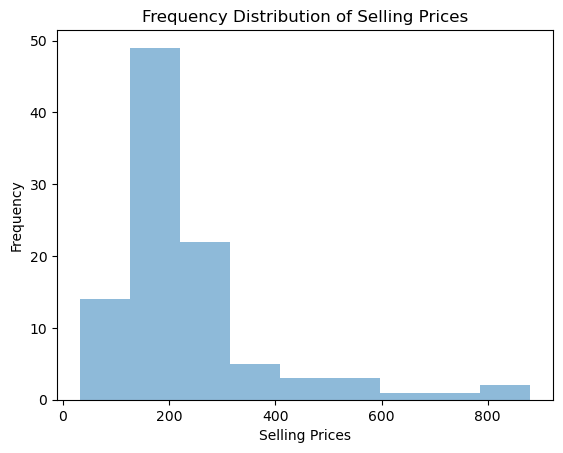

<AxesSubplot:>

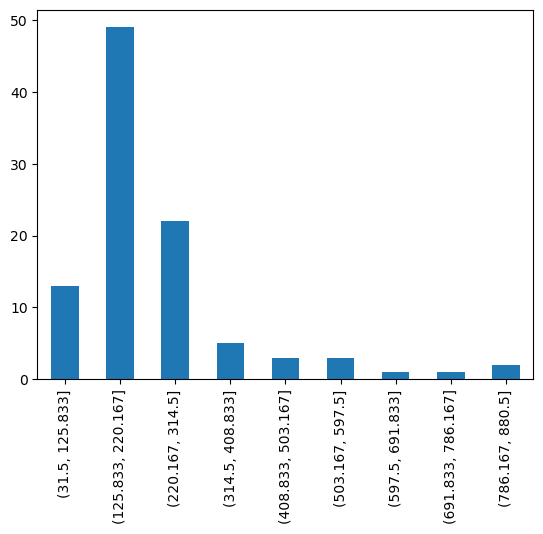

In [831]:
bins = np.linspace(min(Houses['price']), max(Houses['price']), 10)

# Plot the frequency distribution using hist() method
plt.hist(Houses['price'], bins=bins, alpha=0.5)

# Add labels to the x and y axes
plt.xlabel('Selling Prices')
plt.ylabel('Frequency')

# Add a title to the histogram
plt.title('Frequency Distribution of Selling Prices')

# Display the histogram
plt.show()

Houses['price_bin'] = pd.cut(Houses['price'], bins=bins)
counts = Houses['price_bin'].value_counts()
counts.sort_index().plot(kind='bar')


<AxesSubplot:ylabel='Frequency'>

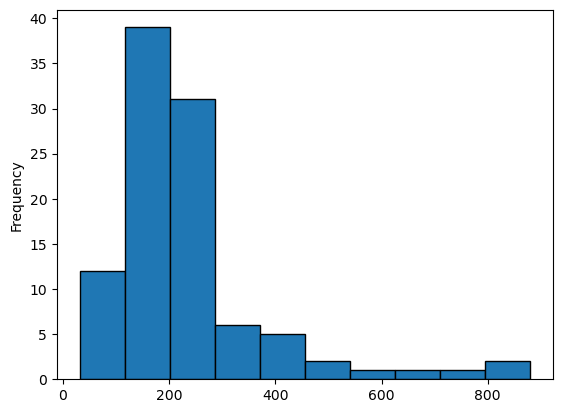

In [832]:
# creating histogram
Houses['price'].plot(kind='hist', edgecolor='black')

In [833]:
mean_price = Houses['price'].mean()
std_price = Houses['price'].std()

In [834]:
mean_price

232.99649999999994

In [835]:
std_price

151.89331886527822

In [836]:
lower_bound = mean_price - std_price
lower_bound

81.10318113472172

In [837]:
upper_bound = mean_price + std_price
upper_bound

384.88981886527813

In [838]:
num_within_range = Houses.loc[(Houses['price'] >= lower_bound) & (Houses['price'] <= upper_bound)].shape[0]
percentage = num_within_range / Houses.shape[0]
num_within_range

85

In [839]:
# calculating 
print("Percentage of observations within one standard deviation of the mean: ", percentage)

Percentage of observations within one standard deviation of the mean:  0.85


/Users/shanijeet/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


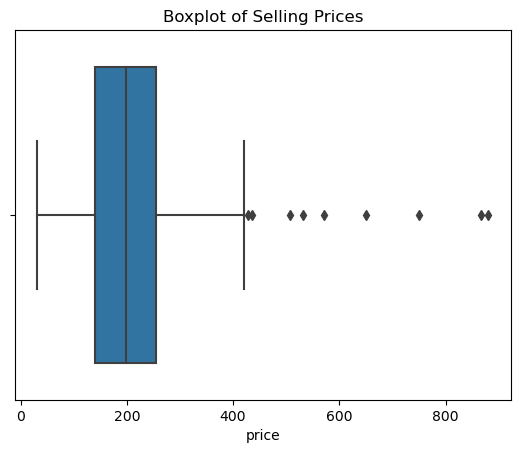

In [841]:
#creating boxplot
import seaborn as sns
sns.boxplot(Houses["price"])
plt.title('Boxplot of Selling Prices')
plt.show()